# Proyecto MCPP
## Por: Daniela Carrillo Díaz

### Pregunta de investigación:

¿Qué opinan los usuarios de Twitter (en Colombia) acerca de la demanda presentada ante la Corte Constitucional por el movimiento feminista Causa Justa que busca eliminar la IVE (aborto) como delito del Código Penal?

El presente trabajo, que busca responder la pregunta de investigación expuesta anteriormente, se justifica de la siguiente manera:
 - Primero, las opiniones y sentimientos (positivos, neutrales o negativos) pueden tener una incidencia sobre el fallo de la Corte Constitucional. Operan como una especie de presión social que se da desde las redes sociales, en este caso, Twitter, por lo que se puede llegar a predecir el fallo.
 - Segundo, en caso  tal de que la corte falle a favor de la demanda, será necesaria una política pública que regule estos temas; por ejemplo, para que todas las mujeres puedan acceder a una IVE en igual medida, sin tener que enfrentarse a gran cantidad de barreras, y que ante todo, puedan acceder de manera segura. 

### Para responder lo anterior:

Se hace un análisis de sentimientos (también conocido como minería de opinión) para determinar cómo se sienten los usuarios de Twitter en Colombia acerca de la demanda que busca eliminar la IVE como delito del Código Penal. Pueden expresar sentimientos positivos, neutrales o negativos. Es decir, pueden estar a favor, ser indiferentes o estar en contra de la demanda llevada a la corte por el movimiento feminista Causa Justa. 
La demanda es conocida en los medios como Causa Justa Por El Aborto (gracias al nombre del movimiento feminista que hace un año puso la demanda), por lo que el análisis de sentimientos se hará de los tweets bajo el hashtag "#CausaJustaPorElAborto".

Se hace uso de la librería de python tweepy para extraer los tweets de Twitter bajo el hashtag #CausaJustaPorElAborto. Es importante mencionar que Twitter sólo deja extraer un máximo de aproximadamente 2500 tweets que no hayan sido publicados hace más de una semana. 

In [82]:
# Instalo e importo librerías importantes
!pip install tweepy
import tweepy as tw
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/daniela/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Defino keys y tokens de la App de Twitter 
consumer_key= 'bMyMZNv6NAQnEdDIID63lpxd9'
consumer_secret= '3j2tPftDtrj3cnqhxtvUOUdcDMUVQQg8n4Jm4pKcQgmR3FdlZd'
access_token= '395659204-mY9RhOn63QCYxLYokHi8y5jlYXrvobWLZAWPxlYC'
access_token_secret= '9Pur2wpZDID3ZYYdZrNPyh0iN5CvoaE0pCiaT8zE46RSc'

In [3]:
# Realizo la autenticación de Twitter
auth = tw.OAuthHandler(consumer_key, consumer_secret)   
auth.set_access_token(access_token, access_token_secret) 
  
# Creo el objeto API 
api = tw.API(auth)

In [4]:
# Creo una lista con el contenido de los Tweets encontrados bajo el hashtag
# #CausaJustaPorElAborto. 


tweets_list = tw.Cursor(api.search_tweets, q="#CausaJustaPorElAborto",tweet_mode='extended', 
                        lang="es").items()
tweets_list

In [5]:
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    print(text)
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    
    line = {'text' : text, 'favourite_count' : favourite_count, 'retweet_count' : retweet_count, 'created_at' : created_at}
    output.append(line)

@CConstitucional La interpretación restrictiva de una causal puede hacer que un aborto legal se transforme en delito. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Asegurar la justicia supone reconocer el valor de la vida de todas las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
#CausaJustaPorElAborto🇨🇴:

"Cristina Rosero (@crisroseroa), asesora legal del Centro, indicó que, en el parecer de Causa Justa, no hay una base jurídica para aceptar el impedimento presentado por el magistrado Linares".

https://t.co/roLSsiIlbZ
@CConstitucional Las mujeres son las cuidadores principales en la sociedad: deberían poder decidir sobre su maternidad. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El marco de políticas públicas en materia de IVE protege a las mujeres en el ejercicio de este derecho. Tenemos más de #90Argumentos para que la #CorteVoteSí

@CConstitucional La mayoría de los abortos inducidos ocurren durante el primer trimestre del embarazo. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La sobre regulación en materia de aborto no funciona en la práctica. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El factor de interpretación de las causales del aborto legal es problemático. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La práctica del aborto es fuente de atribuciones negativas hacia los prestadores y las mujeres que lo realizan. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Pese al modelo de causales vigente en el país más del 99% de los abortos son ilegales y las complicaciones son comunes. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La eliminación del deli

@CConstitucional La liberalización no incrementa los abortos. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El marco de políticas públicas en materia de IVE protege a las mujeres en el ejercicio de este derecho. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Asegurar la justicia supone reconocer el valor de la vida de todas las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La muejer es la única que debería determinar cuánto riesgo está dispuesta a correr. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @viejas_verdes: @CConstitucional No toda declaración de objeción de conciencia es legal. Tenemos más de #90Argumentos para que la #Corte…
@CConstitucional La sobre regulación en materia de aborto no funciona en la práctica. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #Caus

@CConstitucional El factor de interpretación de las causales del aborto legal es problemático. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional En colombia el 67% de los embarazos no son planeados. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La penalización y el delito de aborto en Colombia y América Latina es una norma dictada por hombres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La opinión mayoritaria de la población colombiana apoya la autonomía de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El modelo de causales a veces es usado para judicializar a las mujeres por el delito de aborto. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Cuando el aborto está penalizado se producen complicaciones evitables que 

@CConstitucional Las normas internacionales protegen los derechos reproductivos como parte de los derechos humanos, incluído el aborto. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Las facultades de medicina y otras areas de la salud están en mora al no incluir la IVE en el currículo y el desarrollo de las competencias de los profesionales. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Tanto el modelo de causales como el de plazos son restrictivos. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Permitir el aborto voluntario sólo en algunas circunstancias deslegitima la decisión de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Por desconocimiento del marco legal sobre IVE muchos profesionales del sector salud terminan impidiendo el acceso a los servicios. Tenemos má

RT @agualaboca: 🧵👀Ayer vencía el plazo para que la @CConstitucional tomara una decisión sobre la demanda del movimiento @causajustaco, que…
@CConstitucional La mala implementación del aborto legal en Colombia ha profundizado las desigualdades. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La liberalización no incrementa los abortos. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El establecimiento de causales o excepciones es arbitrario y menoscaba el goce pleno de los derechos de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El aborto es un derecho en tensión con un delito que persiste. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Las normas internacionales protegen los derechos reproductivos como parte de los derechos humanos, incluído el aborto. Tenemos más de #

RT @RostroColectivo: @CConstitucional El delito de aborto no sólo no elimina su práctica sino que acarrea enormes consecuencias y produce d…
@CConstitucional La laicidad del Estado es una condición para evitar interferencias sobre la libertad de las personas y en especial de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El delito de aborto es improcedente, ineficaz, innecesario y violatorio de la moral privada. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El delito de aborto no sólo no elimina su práctica sino que acarrea enormes consecuencias y produce daño. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El delito de aborto no sólo no elimina su práctica sino que acarrea enormes consecuencias y produce daño. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Desde 2006

RT @agualaboca: 🧵👀Ayer vencía el plazo para que la @CConstitucional tomara una decisión sobre la demanda del movimiento @causajustaco, que…
@CConstitucional La penalización obstaculiza el acceso a la información y el acceso pleno de las mujeres a su ciudadania. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La práctica del aborto en Colombia está limitada por las barreras para el acceso. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La práctica del aborto en Colombia está limitada por las barreras para el acceso. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Las políticas de aborto que penalizan a las mujeres están informadas por el menor valor que asignan a sus vidas y, a la vez, por el mayor que se otorga a la vida biológica. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Los s

@CConstitucional La penalización del aborto no es la única alternativa para proteger la vida en gestación. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Las barreras a la IVE se intensifican en las zonas de conflicto armado. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La eliminación del delito de aborto del código penal es una cuestión de democracia. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Incumplir las normas sobre aborto puede generar faltas civíles, administrativas, o penales. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La liberalización no incrementa los abortos. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @paobraussin1101: #CorteAbortoSi #causajustaporelaborto Son miles miles de mujeres q no tienen acceso a una salud sexua

@CConstitucional Tanto el modelo de causales como el de plazos son restrictivos. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Los triunfos de los grupos antiderechos han sido pocos en los últimos años. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Por desconocimiento del marco legal sobre IVE muchos profesionales del sector salud terminan impidiendo el acceso a los servicios. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional En colombia no existe un derecho a la vida del no nacido. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El delito de aborto es improcedente, ineficaz, innecesario y violatorio de la moral privada. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Los sistemas jurídicos que establecen o excepciones para el aborto

@CConstitucional Las normas sobre aborto se nutren del derecho y sus disposiciones legales, tanto como de la moral. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La muejer es la única que debería determinar cuánto riesgo está dispuesta a correr. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La muejer es la única que debería determinar cuánto riesgo está dispuesta a correr. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Después de la despenalización del aborto en el país no prosperó en el congreso ningún proyecto contrario al derecho al aborto o que implicara retroceso en esta materia. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La práctica del aborto es fuente de atribuciones negativas hacia los prestadores y las mujeres que lo realizan. Tenemos más de #90Argumentos para que l

@CConstitucional La garantía de los derechos y en especial del respeto a la vida privada, se beneficia de leyes no restrictivas. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La penalización del aborto no es la única alternativa para proteger la vida en gestación. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La interpretaciónd el marco legal sobre IVE sigue siendo restrictiva y sesgada. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El acceso al aborto de niñas, adolescentes y mujere en condicion de discapacidad debe garantizarse en dorma segura. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La ausencia de inspección, vigilancia y control en materia de IVE es flagrante. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El aborto 

@CConstitucional Cuando el aborto está penalizado se producen complicaciones evitables que generan costos a las personas y al sistema de salud. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional No toda declaración de objeción de conciencia es legal. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Si el test de proporcionalidad se hubiera aplicado adecuadament en Colombia no existiría delito de Aborto. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La persistencia del delito de aborto opera como una de las más perniciosas barreras. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El factor de interpretación de las causales del aborto legal es problemático. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El embarazo forzado es la negación 

@CConstitucional Incumplir las normas sobre aborto puede generar faltas civíles, administrativas, o penales. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Los costos del aborto legal en Colombia son altos a causa de la mala práxis. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Cuando el aborto está penalizado se producen complicaciones evitables que generan costos a las personas y al sistema de salud. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El establecimiento de causales o excepciones es arbitrario y menoscaba el goce pleno de los derechos de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Las barreras a la IVE se intensifican en las zonas de conflicto armado. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La 

@CConstitucional Las barreras a la IVE se intensifican en las zonas de conflicto armado. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La liberalización no incrementa los abortos. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Las mujeres son las cuidadores principales en la sociedad: deberían poder decidir sobre su maternidad. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @viejas_verdes: @CConstitucional Cuando el aborto está penalizado se producen complicaciones evitables que generan costos a las personas…
RT @d_ibarra: Días, porque buenos los argumentos a favor de eliminar el aborto como delito en el código penal.

#CorteVoteSí #CausaJustaPor…
@CConstitucional Ejercer la obejeción de conciencia tiene límites e implica obligaciones claras por parte de los profesionales de la salud. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #C

@CConstitucional Permitir el aborto voluntario sólo en algunas circunstancias deslegitima la decisión de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @QuenaRibadeneir: 💚💚💚En este día histórico esperamos que la @CConstitucional siga garantizando los derechos que nos niega el Congreso.…
RT @ReproRightsLAC: Cada día que pasa sin eliminar el delito de aborto del código penal es una condena para las mujeres y niñas en Colombia…
RT @IvanDariohR: A los hombres que están en contra del aborto, un derecho fundamental que solo compromete a las mujeres, mañana es el día i…
@CConstitucional A los fines de la pena, el aborto no debería ser un delito. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @ReproRightsLAC: 💚 ¡Llegó el día! 💚 

#AbortoEs un servicio de salud esencial y hoy la @CConstitucional 🇨🇴 puede hacer historia garantiz…
@CConstitucional Desde 2006 los grupos conservadores han buscado retroceder los

@CConstitucional El modelo de causales a veces es usado para judicializar a las mujeres por el delito de aborto. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Ejercer la obejeción de conciencia tiene límites e implica obligaciones claras por parte de los profesionales de la salud. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Los triunfos de los grupos antiderechos han sido pocos en los últimos años. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La mayoría de los abortos inducidos ocurren durante el primer trimestre del embarazo. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El reconocimiento de la autonomía de las mujeres es un prerequisito para la construcción de paz. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @ReproRightsLAC: Cada dí

@CConstitucional Permitir el aborto voluntario sólo en algunas circunstancias deslegitima la decisión de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @GIRE_mx: Hoy se cumplía el plazo para que la @CConstitucional se posicionara sobre la eliminación del aborto como delito, pero aún no t…
@CConstitucional La mayoría de los abortos inducidos ocurren durante el primer trimestre del embarazo. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @d_ibarra: Días, porque buenos los argumentos a favor de eliminar el aborto como delito en el código penal.

#CorteVoteSí #CausaJustaPor…
RT @d_ibarra: Días, porque buenos los argumentos a favor de eliminar el aborto como delito en el código penal.

#CorteVoteSí #CausaJustaPor…
@CConstitucional Los argumentos prevalentes en los proyectos de ley a favor del aborto discutidos en las tres últimas legislaturas están relacionados con la autonomía reproductiva de la mujer.

RT @womenslink: Esta mañana estuvimos en @ArribaBogota hablando sobre la demanda de @causajustaco. Nuestra abogada @LaMariArdila explica qu…
@CConstitucional Las fallas administrativas en los servicios de salud impiden a las mujeres acceder a la IVE. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @d_ibarra: Días, porque buenos los argumentos a favor de eliminar el aborto como delito en el código penal.

#CorteVoteSí #CausaJustaPor…
@CConstitucional Asegurar la justicia supone reconocer el valor de la vida de todas las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
La eliminación del aborto como delito en el Código Penal de Colombia es fundamental para erradicar las maternidades forzadas.
@causajustaco
@CConstitucional
#CorteAbortoSí
#CausaJustaPorElAborto https://t.co/roGkJBm4cv
@CConstitucional La penalización parcial o total del aborto minimiza la capacidad moral de las mujeres para tomar decisiones sob

RT @agualaboca: A muchas personas no nos cambiaría vida la eliminación del delito de aborto del Código Penal. ¿Saben a quién sí se las camb…
@CConstitucional La mala implementación del aborto legal en Colombia ha profundizado las desigualdades. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La interpretaciónd el marco legal sobre IVE sigue siendo restrictiva y sesgada. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Tanto el modelo de causales como el de plazos son restrictivos. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La objeción de conciencia impacta negativamente no sólo el acceso de las mujeres a la IVE, sino al propio sistema de sald ocasionando daños a terceros. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Las barreras a la IVE se intensifican en las zonas de conflicto

RT @d_ibarra: Días, porque buenos los argumentos a favor de eliminar el aborto como delito en el código penal.

#CorteVoteSí #CausaJustaPor…
@CConstitucional La práctica del aborto en Colombia está limitada por las barreras para el acceso. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @jovenesvive1: Estamos viviendo un momento inédito de la movilización social feminista por el aborto, acá ya hemos ganado algo y es que…
RT @mesaporlavida: El mensaje de nuestras voceras es claro: Cada día qué pasa sin eliminar el delito de aborto es una condena para las muje…
@CConstitucional La opinión mayoritaria de la población colombiana apoya la autonomía de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Ejercer la obejeción de conciencia tiene límites e implica obligaciones claras por parte de los profesionales de la salud. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPor

Solo es una pausa, pero más pronto que tarde @CConstitucional debe resolver si el aborto voluntario se mantiene como un delito o no.

#CorteVoteSi 
#CausaJustaPorElAborto https://t.co/cGyRWGW3RW
@CConstitucional Las prohibiciones en materia de aborto refuerzan las prácticas contrarias al aborto legal y seguro. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @IvanDariohR: A los hombres que están en contra del aborto, un derecho fundamental que solo compromete a las mujeres, mañana es el día i…
RT @RNMColombia: #ÚltimaHora | Estamos acompañando la rueda de prensa de la @mesaporlavida para hacer un llamado a la @CConstitucional
🤳🏼 C…
@CConstitucional El establecimiento de causales o excepciones es arbitrario y menoscaba el goce pleno de los derechos de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @agualaboca: A muchas personas no nos cambiaría vida la eliminación del delito de aborto del Código Penal

RT @mesaporlavida: Mañana viernes es el último día para que la @corteconstitucional se pronuncie frente a la decisión de despenalización de…
@CConstitucional El sistema de salud colombiano aha incorporado en sus beneficios todas las prestaciones que se requieren para la garantía del aborto seguro. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @viejas_verdes: @CConstitucional La libertad de las mujeres pasa por la eliminación del delito de aborto. Tenemos más de #90Argumentos p…
@CConstitucional La libertad de las mujeres pasa por la eliminación del delito de aborto. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La mujer es un ser humano plenamente digno y no un instrumento de reproducción de la especie humana. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El acceso al aborto de niñas, adolescentes y mujere en condicion de discapacidad debe gar

Hoy #Colombia 🇨🇴 puede hacer historia en Latinoamérica con la eliminación del delito de aborto, 🔥✊🏾 dando el primer paso para que sea regulado sin la amenaza de ir a la cárcel. #CausaJustaporelAborto 💚 #CorteVoteSí 💚 @CConstitucional @causajustaco https://t.co/295leLcz9b
RT @__feminasty: @CConstitucional Cuando el aborto se practica en condiciones de seguridad y aportunidad las mujeres gozan de una vida más…
@CConstitucional La penalización del aborto constituye una injerencia en la vida privada de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @RNMColombia: #ÚltimaHora | Estamos acompañando la rueda de prensa de la @mesaporlavida para hacer un llamado a la @CConstitucional
🤳🏼 C…
RT @d_ibarra: Días, porque buenos los argumentos a favor de eliminar el aborto como delito en el código penal.

#CorteVoteSí #CausaJustaPor…
RT @casa_la: #AbortoEs una deuda pendiente con las mujeres y niñas colombianas. Esperamos que la @CConstitucional falle

@CConstitucional El modelo de causales favorece la exigencia de requisitos no legales. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La penalización parcial o total del aborto minimiza la capacidad moral de las mujeres para tomar decisiones sobre su cuerpo. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional ;Mediante comportamientos individuales los prestadores de salud impiden a las mujeres acceder a la IVE. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @viejas_verdes: @CConstitucional El delito de aborto no sólo no elimina su práctica sino que acarrea enormes consecuencias y produce dañ…
@CConstitucional El delito de aborto no sólo no elimina su práctica sino que acarrea enormes consecuencias y produce daño. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El embarazo forzado es la negación más cr

@CConstitucional La garantía de los derechos y en especial del respeto a la vida privada, se beneficia de leyes no restrictivas. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @LasParcerasCol: @CConstitucional La penalización parcial produce y reproduce la desigualdad. Tenemos más de #90Argumentos para que la #…
@CConstitucional La persistencia del delito de aborto opera como una de las más perniciosas barreras. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @d_ibarra: Días, porque buenos los argumentos a favor de eliminar el aborto como delito en el código penal.

#CorteVoteSí #CausaJustaPor…
@CConstitucional El embarazo forzado es la negación más cruel y evidente del derecho a decidir de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La penalización parcial produce y reproduce la desigualdad. Tenemos más de #90Argumentos para que la #CorteVoteSí

#UnDatoAhi

Paciencia, 

Es el momento de confíar y esperar. 

Más tarde, o más temprano,

 💚    Ganaremos!   💚

Porque es una #CausaJustaPorElAborto 

Y estamos en el lado correcto de la historia. 

Ven-seremos 💚 https://t.co/dnlEE3nSZZ
RT @d_ibarra: Días, porque buenos los argumentos a favor de eliminar el aborto como delito en el código penal.

#CorteVoteSí #CausaJustaPor…
RT @Andreaguzpa: Cuantas historia así. 
Lean esto de @YolandaRuizCe 
Esperemos que hoy la ley se ponga del lado de las mujeres .
#causajust…
RT @agualaboca: A muchas personas no nos cambiaría vida la eliminación del delito de aborto del Código Penal. ¿Saben a quién sí se las camb…
RT @d_ibarra: Días, porque buenos los argumentos a favor de eliminar el aborto como delito en el código penal.

#CorteVoteSí #CausaJustaPor…
@CConstitucional La objeción de conciencia impacta negativamente no sólo el acceso de las mujeres a la IVE, sino al propio sistema de sald ocasionando daños a terceros. Tenemos más de #90Argumentos 

@CConstitucional El debate penal en torno al aborto ha evolucionado a lo largo de los siglos. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @AuraCarolina93: Desde @CDD_Colombia hablamos para @dw_espanol sobre nuestra #CausaJustaPorElAborto 
Seguimos a la espera de que la @CCo…
@CConstitucional Los argumentos prevalentes en los proyectos de ley a favor del aborto discutidos en las tres últimas legislaturas están relacionados con la autonomía reproductiva de la mujer. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @LaMariArdila: Hoy amanecimos más verdes que nunca seguir diciendo #CorteVoteSi a #CausaJustaPorElAborto. Sintonicen @ArribaBogota @sand…
RT @agualaboca: A muchas personas no nos cambiaría vida la eliminación del delito de aborto del Código Penal. ¿Saben a quién sí se las camb…
@CConstitucional Los sistemas jurídicos que establecen o excepciones para el aborto lo hacen de forma arbitraria y discreciona

RT @mesaporlavida: Mañana viernes es el último día para que la @corteconstitucional se pronuncie frente a la decisión de despenalización de…
RT @rocio_pinedag: Aborto y doble moral a la vuelta de la esquina https://t.co/p5aue6zoFZ #causajustaporelaborto @elespectador @ONUMujeres…
RT @Zyberia: A propósito #CausaJustaPorElAborto y perdile a la #CorteVoteSí. Quiero contarles una historia que mi mamá me contó hace poco y…
RT @rocio_pinedag: Aborto y doble moral a la vuelta de la esquina https://t.co/p5aue6zoFZ #causajustaporelaborto @elespectador @ONUMujeres…
@CConstitucional La penalización del aborto no es la única alternativa para proteger la vida en gestación. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Las barreras a la IVE se intensifican en las zonas de conflicto armado. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Desde 2006 los grupos conservadores han buscado retroceder lo

RT @FondoMARIAmx: La @CConstitucional de Colombia tiene en sus manos el poder de eliminar el aborto del Código Penal 💚 Acá te contamos porq…
RT @viejas_verdes: @CConstitucional La comisión asesora para el diseño de la política criminal del Estado Colombiano recomendó despenalizar…
RT @latfemnoticias: 🇨🇴💚#AHORA

❌En Colombia la decisión sobre la despenalización del aborto quedó suspendida. La @CConstitucional no logró…
RT @latfemnoticias: 🇨🇴💚#AHORA

❌En Colombia la decisión sobre la despenalización del aborto quedó suspendida. La @CConstitucional no logró…
@CConstitucional El modelo de causales favorece la exigencia de requisitos no legales. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La liberalización no incrementa los abortos. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @anacrisrestrepo: Escribí para @UniversoCentro. 
Soy mamá de 3 hijos. Mamá de una mujer. Llevo 20 años escribiendo crónica

@CConstitucional La comisión asesora para el diseño de la política criminal del Estado Colombiano recomendó despenalizar todos los hechos que redunden en afectaciones de los derechos de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional El acceso al aborto de niñas, adolescentes y mujere en condicion de discapacidad debe garantizarse en dorma segura. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @viejas_verdes: @CConstitucional Las barreras de acceso al aborto son ilegales: Contrarían la jurisprudencia y normatividad actuales. Te…
@CConstitucional El sistema de salud colombiano aha incorporado en sus beneficios todas las prestaciones que se requieren para la garantía del aborto seguro. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La sobre regulación en materia de aborto no funciona en la práctica. Tenemos más de #90Argumentos para que

@CConstitucional La penalización parcial o total del aborto minimiza la capacidad moral de las mujeres para tomar decisiones sobre su cuerpo. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @VolcanicasRev: Hoy en Colombia la @CConstitucional retoma la discusión por la eliminación del delito de aborto y podría emitir un fallo…
RT @MarcelaValak: Mira @CConstitucional el delito del aborto NO evita que las mujeres aborten, lo que hace es que muchas lo hagan de forma…
@CConstitucional La mujer es un ser humano plenamente digno y no un instrumento de reproducción de la especie humana. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Ejercer la obejeción de conciencia tiene límites e implica obligaciones claras por parte de los profesionales de la salud. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La objeción de conciencia impacta negativamente no sólo 

@CConstitucional El embarazo forzado es la negación más cruel y evidente del derecho a decidir de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @anacrisrestrepo: Escribí para @UniversoCentro. 
Soy mamá de 3 hijos. Mamá de una mujer. Llevo 20 años escribiendo crónicas y columnas p…
@CConstitucional Después de la despenalización del aborto en el país no prosperó en el congreso ningún proyecto contrario al derecho al aborto o que implicara retroceso en esta materia. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
💚Fuimos, somos y seremos historia
La pregunta es, si será o no en la clandestinidad. 💚
#AbortoLegalYa  #CorteAbortoSi 
#causajustaporelaborto https://t.co/WUwQIG8Vyi
@CConstitucional Los argumentos prevalentes en los proyectos de ley a favor del aborto discutidos en las tres últimas legislaturas están relacionados con la autonomía reproductiva de la mujer. Tenemos más de #90Argumentos para que l

@CConstitucional Los sistemas jurídicos que establecen o excepciones para el aborto lo hacen de forma arbitraria y discrecional. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Por desconocimiento del marco legal sobre IVE muchos profesionales del sector salud terminan impidiendo el acceso a los servicios. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @jennyjarapulga: Yo parí tres hijas y apoyo el derecho de las mujeres a decidir sobre su cuerpo. 
𝓛𝓪 𝓶𝓪𝓽𝓮𝓻𝓷𝓲𝓭𝓪𝓭 𝓼𝓮𝓻á 𝓭𝓮𝓼𝓮𝓪𝓭𝓪 𝓸 𝓷𝓸 𝓼𝓮𝓻á.…
@CConstitucional La comisión asesora para el diseño de la política criminal del Estado Colombiano recomendó despenalizar todos los hechos que redunden en afectaciones de los derechos de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @mreyesmilk: Excelente hilo. Sobran los argumentos para la despenalización del aborto en 🇨🇴 (y a tomar nota en 🇵🇪 y tantos otros países

RT @LasParcerasCol: @CConstitucional Los costos del aborto legal en Colombia son altos a causa de la mala práxis. Tenemos más de #90Argumen…
@CConstitucional Los costos del aborto legal en Colombia son altos a causa de la mala práxis. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La mala implementación del aborto legal en Colombia ha profundizado las desigualdades. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
Porque es mi cuerpo, mi salud, mi vida, mi futuro, mi proyecto de vida, mi deseo, mi derecho, mi libertad.
Por esto, pido a la @CConstitucional #CorteVoteSi en la #causajustaporelaborto, pues la maternidad siempre debe ser deseada, nunca obligada.
#CorteAbortoSi
Nunca más una mujer perseguida por decidir sobre su cuerpo, sobre su vida!! #CorteVoteSi #causajustaporelaborto https://t.co/r6A6ruO5iU
@CConstitucional Los triunfos de los grupos antiderechos han sido pocos en los últimos años. Tenem

RT @jennyjarapulga: Yo parí tres hijas y apoyo el derecho de las mujeres a decidir sobre su cuerpo. 
𝓛𝓪 𝓶𝓪𝓽𝓮𝓻𝓷𝓲𝓭𝓪𝓭 𝓼𝓮𝓻á 𝓭𝓮𝓼𝓮𝓪𝓭𝓪 𝓸 𝓷𝓸 𝓼𝓮𝓻á.…
RT @immichl01: Jueves con J de Jamás otra mujer, niña o persona gestante en la cárcel por ejercer su derecho a decidir sobre su propio cuer…
RT @immichl01: Jueves con J de Jamás otra mujer, niña o persona gestante en la cárcel por ejercer su derecho a decidir sobre su propio cuer…
@CConstitucional La mala implementación del aborto legal en Colombia ha profundizado las desigualdades. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Permitir el aborto voluntario sólo en algunas circunstancias deslegitima la decisión de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @CEDESOCIAL: La cita es mañana viernes en el mural #CausaJusta de Barranquilla (Cra 46 con calle 70 esq) 

Estamos cerca de conocer la d…
RT @ReproRightsLAC: 💚 ¡Llegó el día! 💚 

#AbortoEs 

@CConstitucional La penalización del aborto constituye una injerencia en la vida privada de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @ValentinaOnatra: Hoy es un día maravilloso para que la @CConstitucional elimine el delito de aborto. Ni una mujer más, ni una niña más,…
RT @d_ibarra: Jueves con J de Jamás otra mujer, niña o persona gestante en la cárcel por ejercer su derecho a decidir sobre su propio cuerp…
@CConstitucional Los medios escritos en Colombia han posicionado en la opinión pública el apoyo a la IVE y el respeto a la autonomía de las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @ReproRightsLAC: 💚 ¡Llegó el día! 💚 

#AbortoEs un servicio de salud esencial y hoy la @CConstitucional 🇨🇴 puede hacer historia garantiz…
RT @pnietonieto: Señores: ¡no más obstáculos! 
 #causajustaporelaborto https://t.co/KRK0WCbXyF
RT @itamaria83: Está haciendo un día hermoso, como para hacer hi

RT @LaPolaCapucha: @CConstitucional El subregistro del aborto es una constante que refleja la marginalidad del tema. Tenemos más de #90Argu…
RT @RostroColectivo: @CConstitucional Los costos del aborto legal en Colombia son altos a causa de la mala práxis. Tenemos más de #90Argume…
RT @mesaporlavida: @CConstitucional El aborto es un derecho en tensión con un delito que persiste. Tenemos más de #90Argumentos para que la…
RT @CDD_Colombia: Un fallo favorable de la @CConstitucional no solo garantizaría el acceso al aborto seguro sino a todos los derechos sexua…
RT @CDD_Colombia: Esperamos de la @CConstitucional un fallo que garantice la vida y la salud de las mujeres y que reconozca su libertad y a…
RT @anacrisrestrepo: Escribí para @UniversoCentro. 
Soy mamá de 3 hijos. Mamá de una mujer. Llevo 20 años escribiendo crónicas y columnas p…
RT @CDD_Colombia: Esperamos que la #CorteVoteSí por todas las mujeres y niñas que buscan acceder a la IVE de manera legal, segura y oportun…
RT @latfemnot

@CConstitucional No toda declaración de objeción de conciencia es legal. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @anacrisrestrepo: Escribí para @UniversoCentro. 
Soy mamá de 3 hijos. Mamá de una mujer. Llevo 20 años escribiendo crónicas y columnas p…
RT @DanielSamperO: Un fallo favorable de la @CConstitucional no solo garantizaría el acceso al aborto seguro sino a todos los derechos sexu…
Porque juegan así con nuestra paciencia @CConstitucional Porque, porqueeeeeeeee 
#CorteAbortoSí #causajustaporelaborto https://t.co/ptANibquCJ
@CConstitucional El aborto en Colombia está despenalizado parcialmente. Cualquier debate sobre aborto en Colombia solo puede conducir a una ampliación de causales del modelo vigente. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @SaraTrejos: Hola @CConstitucional estamos esperando la eliminación del delito de aborto.

#causajustaporelaborto https://t.co/7CBE5dgULN
RT @latfemnoti

RT @LasParcerasCol: 💚🎶💜Desde ya nos preparamos para el Sí de la @CConstitucional, confiamos en que harán parte del lado bueno de la histori…
@CConstitucional En colombia no existe un derecho a la vida del no nacido. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional La mayoría de los abortos inducidos ocurren durante el primer trimestre del embarazo. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
¡Porque queremos tener autonomía sobre nuestras cuerpas! Hoy compartimos con ustedes una serie de arengas para que nos unamos y exijamos a la @CConstitucional la despenalización del aborto en 🇨🇴 estamos a un solo paso de lograrlo
#CausaJustaPorElAborto
#CorteVoteSí
#CorteAbortoSí https://t.co/bESaur05dl
RT @rocio_pinedag: Aborto y doble moral a la vuelta de la esquina https://t.co/p5aue6zoFZ #causajustaporelaborto @elespectador @ONUMujeres…
RT @LaMariArdila: #AbortoEs una decisión consciente que mujeres han toma

@CConstitucional Pese al modelo de causales vigente en el país más del 99% de los abortos son ilegales y las complicaciones son comunes. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @AleRamirezMarin: La incertidumbre permanente de vivir en Colombia.
Nuestros derechos no dan espera, se tiene que eliminar el delito de…
Se alargó, no puede ser. #CorteVoteSi #causajustaporelaborto https://t.co/tDTZcfMKMX
RT @anacrisrestrepo: Escribí para @UniversoCentro. 
Soy mamá de 3 hijos. Mamá de una mujer. Llevo 20 años escribiendo crónicas y columnas p…
Hoy la Corte retomó la discusión por la eliminación del delito de aborto 

ESTA ES UNA CITA CON LA LIBERTAD 💚 

#causajustaporelaborto #CorteVoteSí #CorteDigaSí #CorteAbortoSí https://t.co/PLbBQP7nPx
Desde mi experiencia personal, la IVE como opción me tranquilizó y pude decidir desde la conciencia, no desde el miedo.
@CConstitucional queremos maternidades conscientes y deseadas #CorteVoteSi en la #causajustapor

RT @nxthxchxs: Por las mujeres, por las personas gestantes, pero sobre todo por ellas: por las jóvenes que vienen y que merecen garantías p…
RT @nxthxchxs: Por las mujeres, por las personas gestantes, pero sobre todo por ellas: por las jóvenes que vienen y que merecen garantías p…
RT @Arpistina1: De la Corte espero una decisión sin ambages, sin delito. #cortevotesí a la #CausaJustaPorElAborto @causajustaco @mesaporlav…
RT @womenslink: 🧵👀💚👊🇨🇴En este súper hilo conocerás 20 de las grandes  figuras jurídicas que han apoyado a @causajustaco, el movimiento que…
@CConstitucional La persistencia del delito de aborto opera como una de las más perniciosas barreras. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @MKamilaC: Hoy la @CConstitucional tiene en sus manos la posibilidad de hacer que el derecho penal,al menos en parte,deje de ser una her…
RT @womenslink: Dentro de muy poco la @CConstitucional de 🇨🇴 decidirá si elimina el delito de aborto del Código 

@CConstitucional El delito de aborto no sólo no elimina su práctica sino que acarrea enormes consecuencias y produce daño. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
@CConstitucional Esta gente que no entiende la imagen de un gatito con una pañoleta verde no puede ser la misma gente que decida sobre la maternidad de las mujeres en todo un pais #CorteAbortoSí #CorteVoteSí #Aborto #causajustaporelaborto #AbortoLegalYa #AbortoLegal https://t.co/nBl7nLmM9d
RT @d_ibarra: Jueves con J de Jamás otra mujer, niña o persona gestante en la cárcel por ejercer su derecho a decidir sobre su propio cuerp…
RT @SaraTrejos: Qué triste cuando no se dan cuenta del poder que tienen con su voz y además mezclan peras con manzanas. 

De qué estás habl…
RT @Valeruizrl: Nunca he tenido que abortar y espero jamás tener que hacerlo por qué es un proceso traumático, sin embargo considero que es…
RT @saricastellanos: Educación sexual para decidir,
Anticonceptivos para no abort

RT @causajustaco: Desde septiembre de 2020 demandamos ante la @CConstitucional el Art. 122 del Código Penal por vulnerar los derechos funda…
@CConstitucional Las facultades de medicina y otras areas de la salud están en mora al no incluir la IVE en el currículo y el desarrollo de las competencias de los profesionales. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @mesaporlavida: @CConstitucional La sobre regulación en materia de aborto no funciona en la práctica. Tenemos más de #90Argumentos para…
RT @latfemnoticias: 🇨🇴💚En las calles de Colombia se respira lucha

🔥El país nunca estuvo tan cerca de la despenalización del aborto. El vie…
@CConstitucional Incumplir las normas sobre aborto puede generar faltas civíles, administrativas, o penales. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @viejas_verdes: @CConstitucional La mala implementación del aborto legal en Colombia ha profundizado las desigualdades. Ten

RT @d_ibarra: Jueves con J de Jamás otra mujer, niña o persona gestante en la cárcel por ejercer su derecho a decidir sobre su propio cuerp…
RT @viejas_verdes: @CConstitucional La mala implementación del aborto legal en Colombia ha profundizado las desigualdades. Tenemos más de #…
RT @mesaporlavida: ¿Quiénes son las más afectadas por esta situación? Las que viven en mayor pobreza, en zonas rurales o afectadas por el c…
RT @ReproRightsLAC: Estuvimos en @BluRadioCo y nuestra asesora legal @CrisRoseroa le contó a @NestorMoralesC cuál es nuestra #CausaJustaPor…
@CConstitucional La mala implementación del aborto legal en Colombia ha profundizado las desigualdades. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @laorejaroja: ¡Es necesario que el aborto se regule en el ámbito de la salud y fuera del penal! #laorejaroja #CausaJustaPorElAborto http…
RT @cuestion_p: 8. Por otro lado, Catalina Martínez (@catamartinezc)  directora del Centro de Derechos Reprod

@CConstitucional El aborto sigue siendo un problema de salud pública en Colombia y en el mundo. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @catamartinezc: Buenos días. Hoy es el día @CConstitucional. Hoy es el día para avanzar en el reconocimiento de nuestros derechos. Tiene…
RT @nxthxchxs: Por las mujeres, por las personas gestantes, pero sobre todo por ellas: por las jóvenes que vienen y que merecen garantías p…
RT @anacrisrestrepo: Escribí para @UniversoCentro. 
Soy mamá de 3 hijos. Mamá de una mujer. Llevo 20 años escribiendo crónicas y columnas p…
@CConstitucional La prohibición del aborto genera un andamiaje institucional de enormes proporciones. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @itamaria83: Está haciendo un día hermoso, como para hacer historia 🕯🤞🏻💚

@CConstitucional @causajustaco #CorteVoteSí #CorteAbortoSí #ca…
RT @Eliotalvaro: Yo sí quiero cantar mañana al menos: "19 de noviembre, de

Desde que tenemos las causales, en vez de reducirse, se han incrementado los procesos penales y condenas por aborto contra mujeres en contextos de mayor vulnerabilidad: víctimas de violencias, niñas y adolescentes #CorteVoteSí a la #CausaJustaPorElAborto https://t.co/PZdeINCHVo
RT @mesaporlavida: @CConstitucional La jurisprudencia sobre aborto en el país reafirma la utonomia de las mujeres, protege su derecho a la…
@CConstitucional Los avances en materia de acceso al aborto son incipientes pero sólidos. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @causajustaco: El modelo de causales permite a unas mujeres abortar y a otras no. #AbortoEs proteger los derechos de todas las mujeres y…
Porque el delito de aborto no garantiza que estos no se practiquen, por el contrario pone en riesgo la vida de muchas mujeres que acuden a la clandestinidad. @CConstitucional #CorteVoteSi #CorteAbortoSi #causajustaporelaborto
@CConstitucional La libertad de las mujere

RT @La_Goye_: 💚 ¡Llegó el día, llegó, llegó!💚 

#AbortoEs un derecho y un servicio de salud esencial. 

Hoy es el día señoras y señores de…
RT @crisroseroa: Acá @ilusa_Gomez y yo les presentamos a Ivelina, quien también le está pidiendo a la @CConstitucional que #CorteVoteSi a l…
@CConstitucional Asegurar la justicia supone reconocer el valor de la vida de todas las mujeres. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @laorejaroja: ¡Es necesario que el aborto se regule en el ámbito de la salud y fuera del penal! #laorejaroja #CausaJustaPorElAborto http…
RT @ChavitaMateus: #AbortoEs una decisión que en este momento es solo un privilegio para una pocas. Con la eliminación del delito de aborto…
@CConstitucional Los argumentos prevalentes en los proyectos de ley a favor del aborto discutidos en las tres últimas legislaturas están relacionados con la autonomía reproductiva de la mujer. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #Causa

@CConstitucional ;Mediante comportamientos individuales los prestadores de salud impiden a las mujeres acceder a la IVE. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @ReproRightsLAC: 👊💚💪 Fav si también quieres la despenalización del aborto en Colombia 🇨🇴

#CausaJustaPorElAborto #AbortoEs #CorteAbortoSí
RT @marulojose: “Me acostaré tranquila el día que el aborto no sea un delito”, afirma Manuela, quien fue indiciada por el delito de aborto.…
@CConstitucional La distribución de los servicios de aborto en Colombia es profundamente inequitativa. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJustaPorElAborto
RT @jennyjarapulga: Yo parí tres hijas y apoyo el derecho de las mujeres a decidir sobre su cuerpo. 
𝓛𝓪 𝓶𝓪𝓽𝓮𝓻𝓷𝓲𝓭𝓪𝓭 𝓼𝓮𝓻á 𝓭𝓮𝓼𝓮𝓪𝓭𝓪 𝓸 𝓷𝓸 𝓼𝓮𝓻á.…
@CConstitucional ;Mediante comportamientos individuales los prestadores de salud impiden a las mujeres acceder a la IVE. Tenemos más de #90Argumentos para que la #CorteVoteSí a la #CausaJust

RT @SAAFfund: Ludeyner es una joven líder del socio de SAAF Si Mujer en Colombia.

Apoya el movimiento #CausaJusta para despenalizar totalm…
RT @MKamilaC: Hoy la @CConstitucional tiene en sus manos la posibilidad de hacer que el derecho penal,al menos en parte,deje de ser una her…
RT @pauwiss: Ustedes me ven tranquila, pero estoy que me quito las uñas de la ansiedad por saber cuál es la decisión de la corte. Hoy es un…
RT @HRI_ONG: 💚 ¡Llegó el día! 💚 

#AbortoEs un servicio de salud esencial y hoy la @CConstitucional 🇨🇴 puede hacer historia garantizando la…
RT @ReproRightsLAC: #AbortoEs un servicio de salud que no debería estar regulado de ninguna manera por el derecho penal porque crea barrera…
RT @latatiap: Este no es el caso de la mayoría. Ninguna tiene por qué llevar a término un embarazo en contra de su voluntad. Por esto, por…
RT @jovenesvive1: ¡Fueron las pibas, fueron las morras, seguimos las parceras!

#CorteAbortoSí #CorteVoteSí #CausaJustaPorElAborto #AbortoL…
RT @laorejaroj

TooManyRequests: 429 Too Many Requests
88 - Rate limit exceeded

In [6]:
# Exporto la información extraída de los Tweets como un DataFrame en formato csv
df = pd.DataFrame(output)
df.to_csv('output.csv')

Ya con los tweets (son 2699, siendo el más antiguo del 18 de noviembre de 2021), se procede a realizar estadísticas descriptivas y visualizaciones. Luego, se hace un análisis de sentimientos. 

In [11]:
# Abro y leo el archivo csv con los tweets extraídos
file = open('output.csv')
data = pd.read_csv("output.csv")
data

,Unnamed: 0,text,favourite_count,retweet_count,created_at
0,0,@CConstitucional La interpretación restrictiva...,0,0,2021-11-21 15:06:09+00:00
1,1,@CConstitucional Asegurar la justicia supone r...,0,0,2021-11-21 15:04:51+00:00
2,2,"#CausaJustaPorElAborto🇨🇴:\n\n""Cristina Rosero ...",1,0,2021-11-21 15:00:38+00:00
3,3,@CConstitucional Las mujeres son las cuidadore...,0,0,2021-11-21 14:58:36+00:00
4,4,@CConstitucional El marco de políticas pública...,0,0,2021-11-21 14:57:17+00:00
...,...,...,...,...,...
2695,2695,@CConstitucional El debate penal en torno al a...,1,0,2021-11-18 20:45:23+00:00
2696,2696,RT @d_ibarra: Jueves con J de Jamás otra mujer...,0,205,2021-11-18 20:45:22+00:00
2697,2697,RT @laorejaroja: ¡Es necesario que el aborto s...,0,40,2021-11-18 20:44:47+00:00
2698,2698,RT @laorejaroja: ¡Es necesario que el aborto s...,0,40,2021-11-18 20:44:41+00:00


In [12]:
# Elimino la primera columna 
data.drop(columns=data.columns[0], 
        axis=1, 
        inplace=True)
data

,text,favourite_count,retweet_count,created_at
0,@CConstitucional La interpretación restrictiva...,0,0,2021-11-21 15:06:09+00:00
1,@CConstitucional Asegurar la justicia supone r...,0,0,2021-11-21 15:04:51+00:00
2,"#CausaJustaPorElAborto🇨🇴:\n\n""Cristina Rosero ...",1,0,2021-11-21 15:00:38+00:00
3,@CConstitucional Las mujeres son las cuidadore...,0,0,2021-11-21 14:58:36+00:00
4,@CConstitucional El marco de políticas pública...,0,0,2021-11-21 14:57:17+00:00
...,...,...,...,...
2695,@CConstitucional El debate penal en torno al a...,1,0,2021-11-18 20:45:23+00:00
2696,RT @d_ibarra: Jueves con J de Jamás otra mujer...,0,205,2021-11-18 20:45:22+00:00
2697,RT @laorejaroja: ¡Es necesario que el aborto s...,0,40,2021-11-18 20:44:47+00:00
2698,RT @laorejaroja: ¡Es necesario que el aborto s...,0,40,2021-11-18 20:44:41+00:00


In [139]:
data.describe()

,favourite_count,retweet_count
count,2700.000000,2700.000000
mean,1.028519,20.251852
std,14.491387,44.068326
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,15.000000
max,678.000000,378.000000


In [83]:
# Importo librerías importantes para el análisis de sentimientos/minería 
!pip install textblob
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/daniela/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

hashtag = input("Por favor escriba el hashtag: ")
cantidad = int(input ("Por favor escriba la cantidad de tweets: "))

# Extraigo los tweets bajo el hashtag en cuestión
tweets = tw.Cursor(api.search_tweets, q=hashtag).items(cantidad)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
# Análisis de sentimientos: defino nuevas columnas en el DataFrame    
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, cantidad)
negative = percentage(negative, cantidad)
neutral = percentage(neutral, cantidad)
polarity = percentage(polarity, cantidad)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Por favor escriba el hashtag: #CausaJustaPorElAborto
Por favor escriba la cantidad de tweets: 2699


In [89]:
# Muestro el número total de tweets, positivos, negativos y neutrales 
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("tweets: ",len(tweet_list))
print("positivos: ",len(positive_list))
print("negativos: ", len(negative_list))
print("neutrales: ",len(neutral_list))

tweets:  2699
positivos:  362
negativos:  483
neutrales:  1854


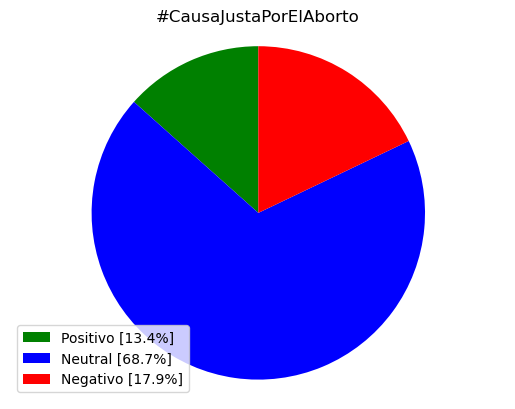

In [88]:
# Muestro los sentimientos a través de un Pie Chart
labels = ['Positivo ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negativo ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ["green","blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("#CausaJustaPorElAborto")
plt.axis('equal')
plt.show()

Análisis del análisis de sentimientos con los tweets no limpios: La gran mayoría de tweets (1854/2699 o 68.7%) son neutrales. Esto quiere decir que, contrario a lo que muchos piensan el debate que se está dando en las redes, por lo menos en la muestra extraida, no tiene una connotación positiva o negativa en torno al tema. Los tweets neutrales son seguidos por los tweets negativos que están presentes en un 17.9%. 

In [7]:
# Creo un nuevo DataFrame
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

# Quito del texto de cada tweet cosas que pueden hacer "ruido", es decir, limpio los tweets

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|(\w+:\/\/\S+)@"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()

NameError: name 'tweet_list' is not defined

In [146]:
# Calculo valores positivos, neutrales, negativos y compuestos 

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negativo"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positivo"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@CConstitucional El aborto es un derecho en te...,el aborto es un derecho en tensión con un de...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
1,@CConstitucional La mala implementación del ab...,la mala implementación del aborto legal en c...,0.2,0.20,positivo,0.000,0.769,0.231,0.4404
2,@CConstitucional El embarazo forzado es la neg...,el embarazo forzado es la negación más cruel...,-1.0,1.00,negativo,0.192,0.808,0.000,-0.5859
3,@CConstitucional La comisión asesora para el d...,la comisión asesora para el diseño de la pol...,-0.4,0.55,negativo,0.185,0.815,0.000,-0.5267
4,@CConstitucional El establecimiento de causale...,el establecimiento de causales o excepciones...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
5,@CConstitucional Las normas sobre aborto se nu...,las normas sobre aborto se nutren del derech...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
6,@CConstitucional ;Mediante comportamientos ind...,;mediante comportamientos individuales los p...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
7,RT @RostroColectivo: @CConstitucional El estab...,el establecimiento de causales o excepcione...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
8,@CConstitucional El establecimiento de causale...,el establecimiento de causales o excepciones...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
9,RT @LaMariArdila: Queremos que en el sistema d...,queremos que en el sistema de salud las mujer...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000


 - Polaridad: puntuación entre -1 y 1 que permite determinar si el texto tiene una connotación positiva o negativa, respectivamente.
 - Subjetividad: puntuación entre 0 y 1 que permite determinar si el texto expresa un hecho o una opinión, respectivamente. 
 - Sentimiento: si la polaridad está entre 0 y 1, el texto es positivo; si está entre -1 y 0, es negativo. Si la polaridad es 0, es neutral.
 - Neg/neu/pos: proporción del texto que es negativo, positivo o neutral.
 - Compound: promedio de polaridad y subjetividad.

In [128]:
# Creo nuevos dataframes con los sentimientos

tw_list_negative = tw_list[tw_list["sentiment"]=="negativo"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positivo"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [129]:
# Cuento la cantidad de tweets con cada sentimiento

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Porcentaje'])

In [130]:
# Muestro la tabla
count_values_in_column(tw_list,"sentiment")

,Total,Porcentaje
neutral,1854,68.69
negativo,483,17.90
positivo,362,13.41


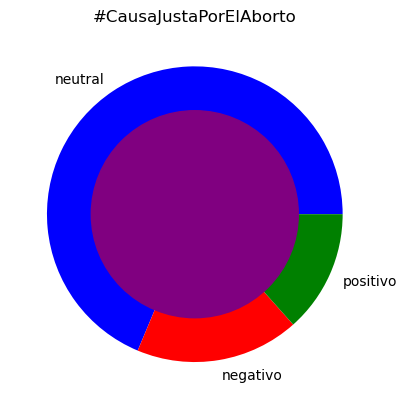

In [145]:
#  Muestro los sentimientos de los tweets limpios a través de un Pie Chart

piechart = count_values_in_column(tw_list,"sentiment")
names= piechart.index
size=piechart["Porcentaje"]
 
my_circle=plt.Circle( (0,0), 0.7, color='purple')
plt.pie(size, labels=names, colors=['blue','red','green'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("#CausaJustaPorElAborto")
plt.show()

Análisis de sentimientos de los tweets limpios: A pesar de que en este punto los tweets están limpios de RTs, menciones, entre otros, los resultados del análisis no cambian. 

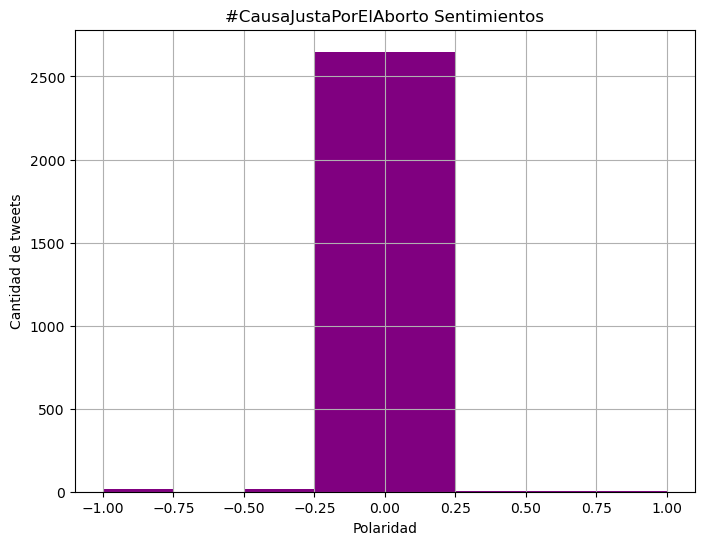

In [148]:
# Histograma para la variable polaridad

fig, ax = plt.subplots(figsize=(8, 6))


tw_list['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("#CausaJustaPorElAborto Sentimientos")
plt.xlabel("Polaridad")
plt.ylabel("Cantidad de tweets")
plt.show()


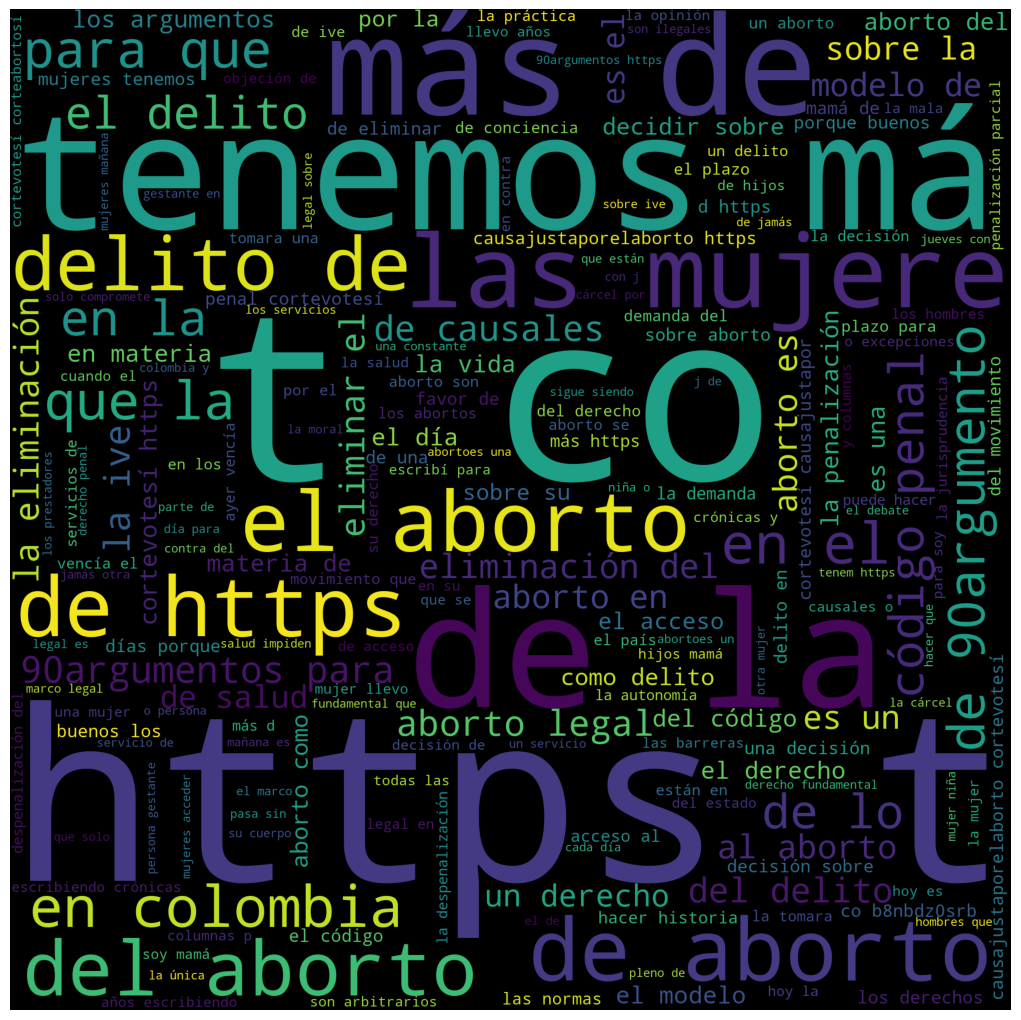

In [138]:
# Wordcloud de las palabras más usadas en los tweets bajo el hashtag

twt = " ".join(tw_list['text'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=2000, height=2000).generate(twt)

plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Análisis: Se puede ver cómo las palabras más utilizadas son: tenemos, de la, más de, las mujeres, de aborto, en colombia, el aborto, aborto legal, la eliminación, entre otras. 

A pesar de que el hashtag #CausaJustaPorElAborto hace referencia a una demanda cuyo fallo será muy importante para las mujeres del país y es un tema tanto sensible como controversial, los resultados del análisis de sentimientos no arrojan posturas tan divididas. La mayoría de los tweets tiene connotaciones neutras, lo que deja en evidencia que, por lo menos para la muestra, los usuarios de twitter son un poco indiferentes. El sentimiento que le sigue a neutral es negativo y por último, positivo. Por ultimo, la nube de palabras muestra palabras o parejas de palabras relacionadas con el tema. 